# M8 Project

In this project you will compare the performance of LDA, SVM, and CNN for face recognition. You will use the Olivetti faces dataset, which contains 400 64x64 images from 40 different subjects, and your task is to discover the identity of a given face image. Some of these images are illustrated below.

<img src="m8project.png" width="400"/>

An initial version of the code with the problem specification (below) and a report template are available (at the bottom). Deliverables are the final code (non-functioning code is worth 0 points) and the comparison report.

Solve the task above using:
- LDA
- SVM
- CNN (40pts) - suggested architecture: LeNet-5

Split the dataset so that the first 8 images per subject are used for training, and the last 2 images are used for testing. If you need a validation set, use part of your training data. For CNN:
- Plot the loss and the accuracy for each training epoch (20pts)
- Store the model with highest accuracy in the validation set (10pts)

Compare the performance of LDA, SVM, and CNN in terms of:
- Average F-Score (15pts)
- Confusion matrix (15pts)

# Implementation

You are free to change the code below as needed.

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Get the dataset

faces = fetch_olivetti_faces()

_, img_height, img_width = faces.images.shape

print(faces.images.shape)

(400, 64, 64)


In [3]:
# Split the dataset

N_IDENTITIES = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE = 8                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices = []
probe_indices = []
for i in range(N_IDENTITIES):
    indices = list(np.where(faces.target == i)[0])
    gallery_indices += indices[:GALLERY_SIZE]
    probe_indices += indices[GALLERY_SIZE:]

x_train = faces.images[gallery_indices].reshape(-1, img_height*img_width) # vectorize train images
y_train = faces.target[gallery_indices]
x_test = faces.images[probe_indices].reshape(-1, img_height*img_width)    # vectorize test images
y_test = faces.target[probe_indices]

print(x_train.shape, x_test.shape)

(320, 4096) (80, 4096)


TRAINING


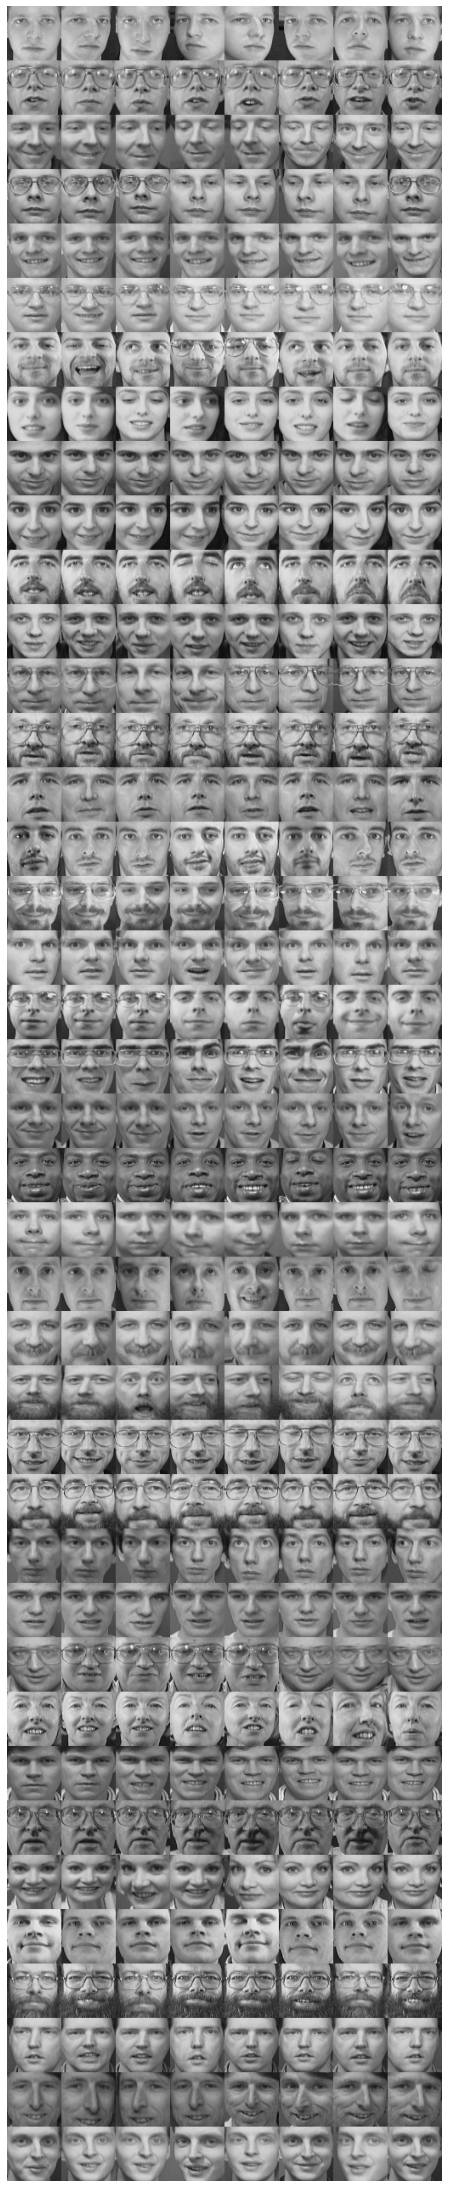

TESTING


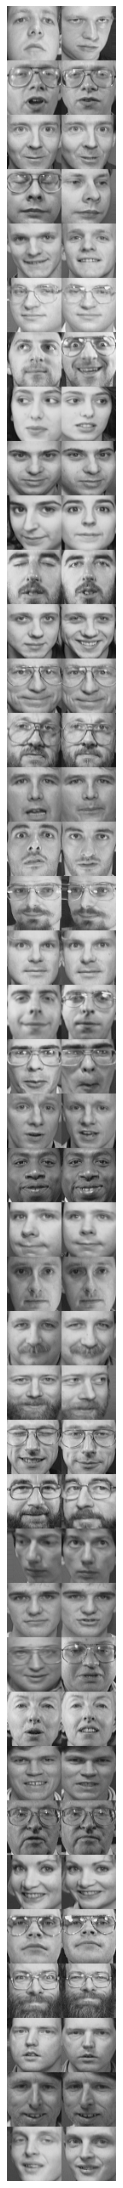

In [4]:
# Visualize image sets
def show_images(imgs, num_rows, num_cols):
    assert len(imgs) == num_rows*num_cols

    full = None
    for i in range(num_rows):
        row = None
        for j in range(num_cols):
            if row is None:
                row = imgs[i*num_cols+j].reshape(img_height, img_width)*255.0
            else:
                row = np.concatenate((row, imgs[i*num_cols+j].reshape(img_height, img_width)*255.0), axis=1)
        if full is None:
            full = row
        else:
            full = np.concatenate((full, row), axis=0)

    f = plt.figure(figsize=(num_cols, num_rows))
    plt.imshow(full, cmap='gray')
    plt.axis('off')
    plt.show()

print('TRAINING')
show_images(x_train, N_IDENTITIES, GALLERY_SIZE)
print('TESTING')
show_images(x_test, N_IDENTITIES, 10 - GALLERY_SIZE)

# Report template

## Experimental results

Training description ... (plot the loss and the accuracy for each training epoch, specify which epoch was used for inference)

Obtained results ...

Analysis of the results ...

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Scelerisque eu ultrices vitae auctor eu augue. Tempor nec feugiat nisl pretium fusce. Sed cras ornare arcu dui vivamus arcu felis. Leo duis ut diam quam nulla porttitor massa. Lacus vestibulum sed arcu non odio euismod lacinia. Augue neque gravida in fermentum et sollicitudin ac orci. Habitant morbi tristique senectus et. Ut tellus elementum sagittis vitae et. Diam vulputate ut pharetra sit amet. Nisl nunc mi ipsum faucibus vitae aliquet nec ullamcorper sit. Nec ullamcorper sit amet risus nullam eget felis. Fringilla ut morbi tincidunt augue interdum velit euismod. Facilisis magna etiam tempor orci eu lobortis.